In [ ]:
# Author: Jung Hun Oh
# Created on Oct 5, 2025

## Install python packages

In [ ]:
!pip install pot
!pip install cvxpy

!pip install openpyxl
!pip install lifelines
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 9.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=910d192b85bbb5232d3d362d065fa7f884f8e49a0c225c10832ceacc83421b95
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59220 sha256=4fbc6ec8dacc10996486c9f583b0f2333fec545e26be95bfcbeaff940516e409
  Stored in directory: /root/.cache/pip/wheels/b4/76/43/

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import math
from sklearn import set_config
from sklearn.impute import SimpleImputer

import networkx as nx
from networkx.algorithms import dfs_labeled_edges

import ot
import cvxpy as cp

set_config(display="text")

## Read radiomic data

In [ ]:
df_all = pd.read_csv("radiomic_data_HN.csv")
df_red = df_all.iloc[:,1:len(df_all.columns)]

## Read correlation data

In [ ]:
corr_data = pd.read_csv("correlation_data.csv")
corr_data = corr_data.iloc[:,1:len(corr_data.columns)]

df_corr = corr_data.copy()
df_corr=df_corr.set_index(df_red.columns)

## Plot the entire network

Index(['Shape_volume', 'Shape_flatness', 'Shape_elongation',
       'Shape_max2dDiameterAxialPlane', 'Shape_Compactness1',
       'Shape_Compactness2', 'Shape_spherDisprop', 'Shape_sphericity',
       'Original_firstOrderS_min', 'Original_firstOrderS_max',
       ...
       'Gabor_voxSz111mm_Sigma4mm_AR1_5_wavLen8mm_OrientAvg_30609012015_firstOrderS_rms',
       'Gabor_voxSz111mm_Sigma4mm_AR1_5_wavLen8mm_OrientAvg_30609012015_firstOrderS_meanAbsDev',
       'Gabor_voxSz111mm_Sigma4mm_AR1_5_wavLen8mm_OrientAvg_30609012015_firstOrderS_medianAbsDev',
       'Gabor_voxSz111mm_Sigma4mm_AR1_5_wavLen8mm_OrientAvg_30609012015_firstOrderS_P10',
       'Gabor_voxSz111mm_Sigma4mm_AR1_5_wavLen8mm_OrientAvg_30609012015_firstOrderS_P90',
       'Gabor_voxSz111mm_Sigma4mm_AR1_5_wavLen8mm_OrientAvg_30609012015_firstOrderS_robustMeanAbsDev',
       'Gabor_voxSz111mm_Sigma4mm_AR1_5_wavLen8mm_OrientAvg_30609012015_firstOrderS_robustMedianAbsDev',
       'Gabor_voxSz111mm_Sigma4mm_AR1_5_wavLen8mm_OrientAv

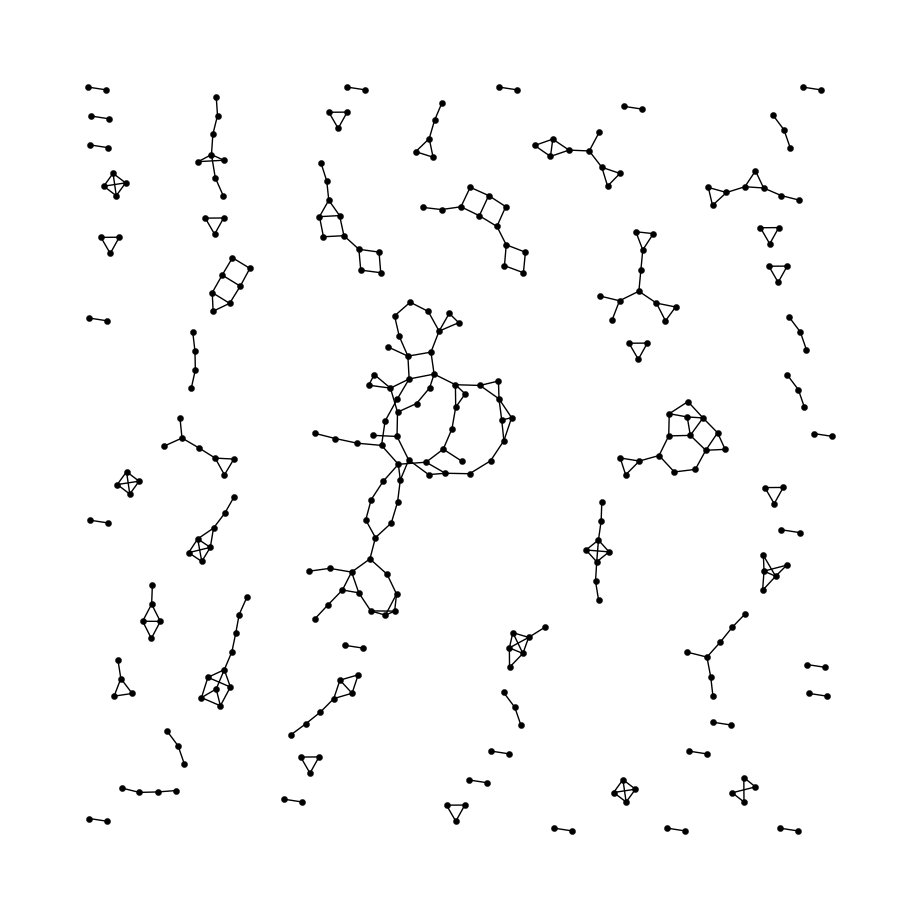

In [ ]:
cor_matrix = np.asmatrix(df_corr)
n=len(df_red.columns)
variables=df_red.columns
print(variables)
threshold=0.15
G=nx.Graph()

for i in range(n):
    for j in range(n):
      if i> j and abs(cor_matrix[i,j]) > threshold:
        G.add_edge(variables[i],variables[j], weight=1)

plt.figure(1,figsize=(9,9))
nx.draw(G, pos = nx.nx_pydot.graphviz_layout(G), node_size=20, \
    node_color='black', linewidths=0.25, font_size=0.1, \
    font_weight='bold', with_labels=False )
adj = nx.adjacency_matrix(G)

# Find the largest network component

<Compressed Sparse Row sparse array of dtype 'int64'
	with 164 stored elements and shape (65, 65)>
  Coords	Values
  (0, 3)	1
  (0, 56)	1
  (1, 27)	1
  (1, 41)	1
  (2, 19)	1
  (2, 36)	1
  (2, 55)	1
  (3, 0)	1
  (3, 56)	1
  (4, 30)	1
  (5, 63)	1
  (6, 25)	1
  (6, 32)	1
  (7, 28)	1
  (7, 30)	1
  (7, 34)	1
  (7, 35)	1
  (8, 27)	1
  (8, 38)	1
  (8, 47)	1
  (8, 54)	1
  (9, 41)	1
  (9, 56)	1
  (10, 15)	1
  (10, 31)	1
  :	:
  (56, 0)	1
  (56, 3)	1
  (56, 9)	1
  (56, 38)	1
  (57, 33)	1
  (57, 52)	1
  (58, 49)	1
  (58, 53)	1
  (59, 14)	1
  (59, 20)	1
  (59, 51)	1
  (60, 36)	1
  (60, 62)	1
  (61, 20)	1
  (61, 42)	1
  (61, 62)	1
  (62, 42)	1
  (62, 60)	1
  (62, 61)	1
  (63, 5)	1
  (63, 21)	1
  (63, 53)	1
  (64, 16)	1
  (64, 29)	1
  (64, 37)	1


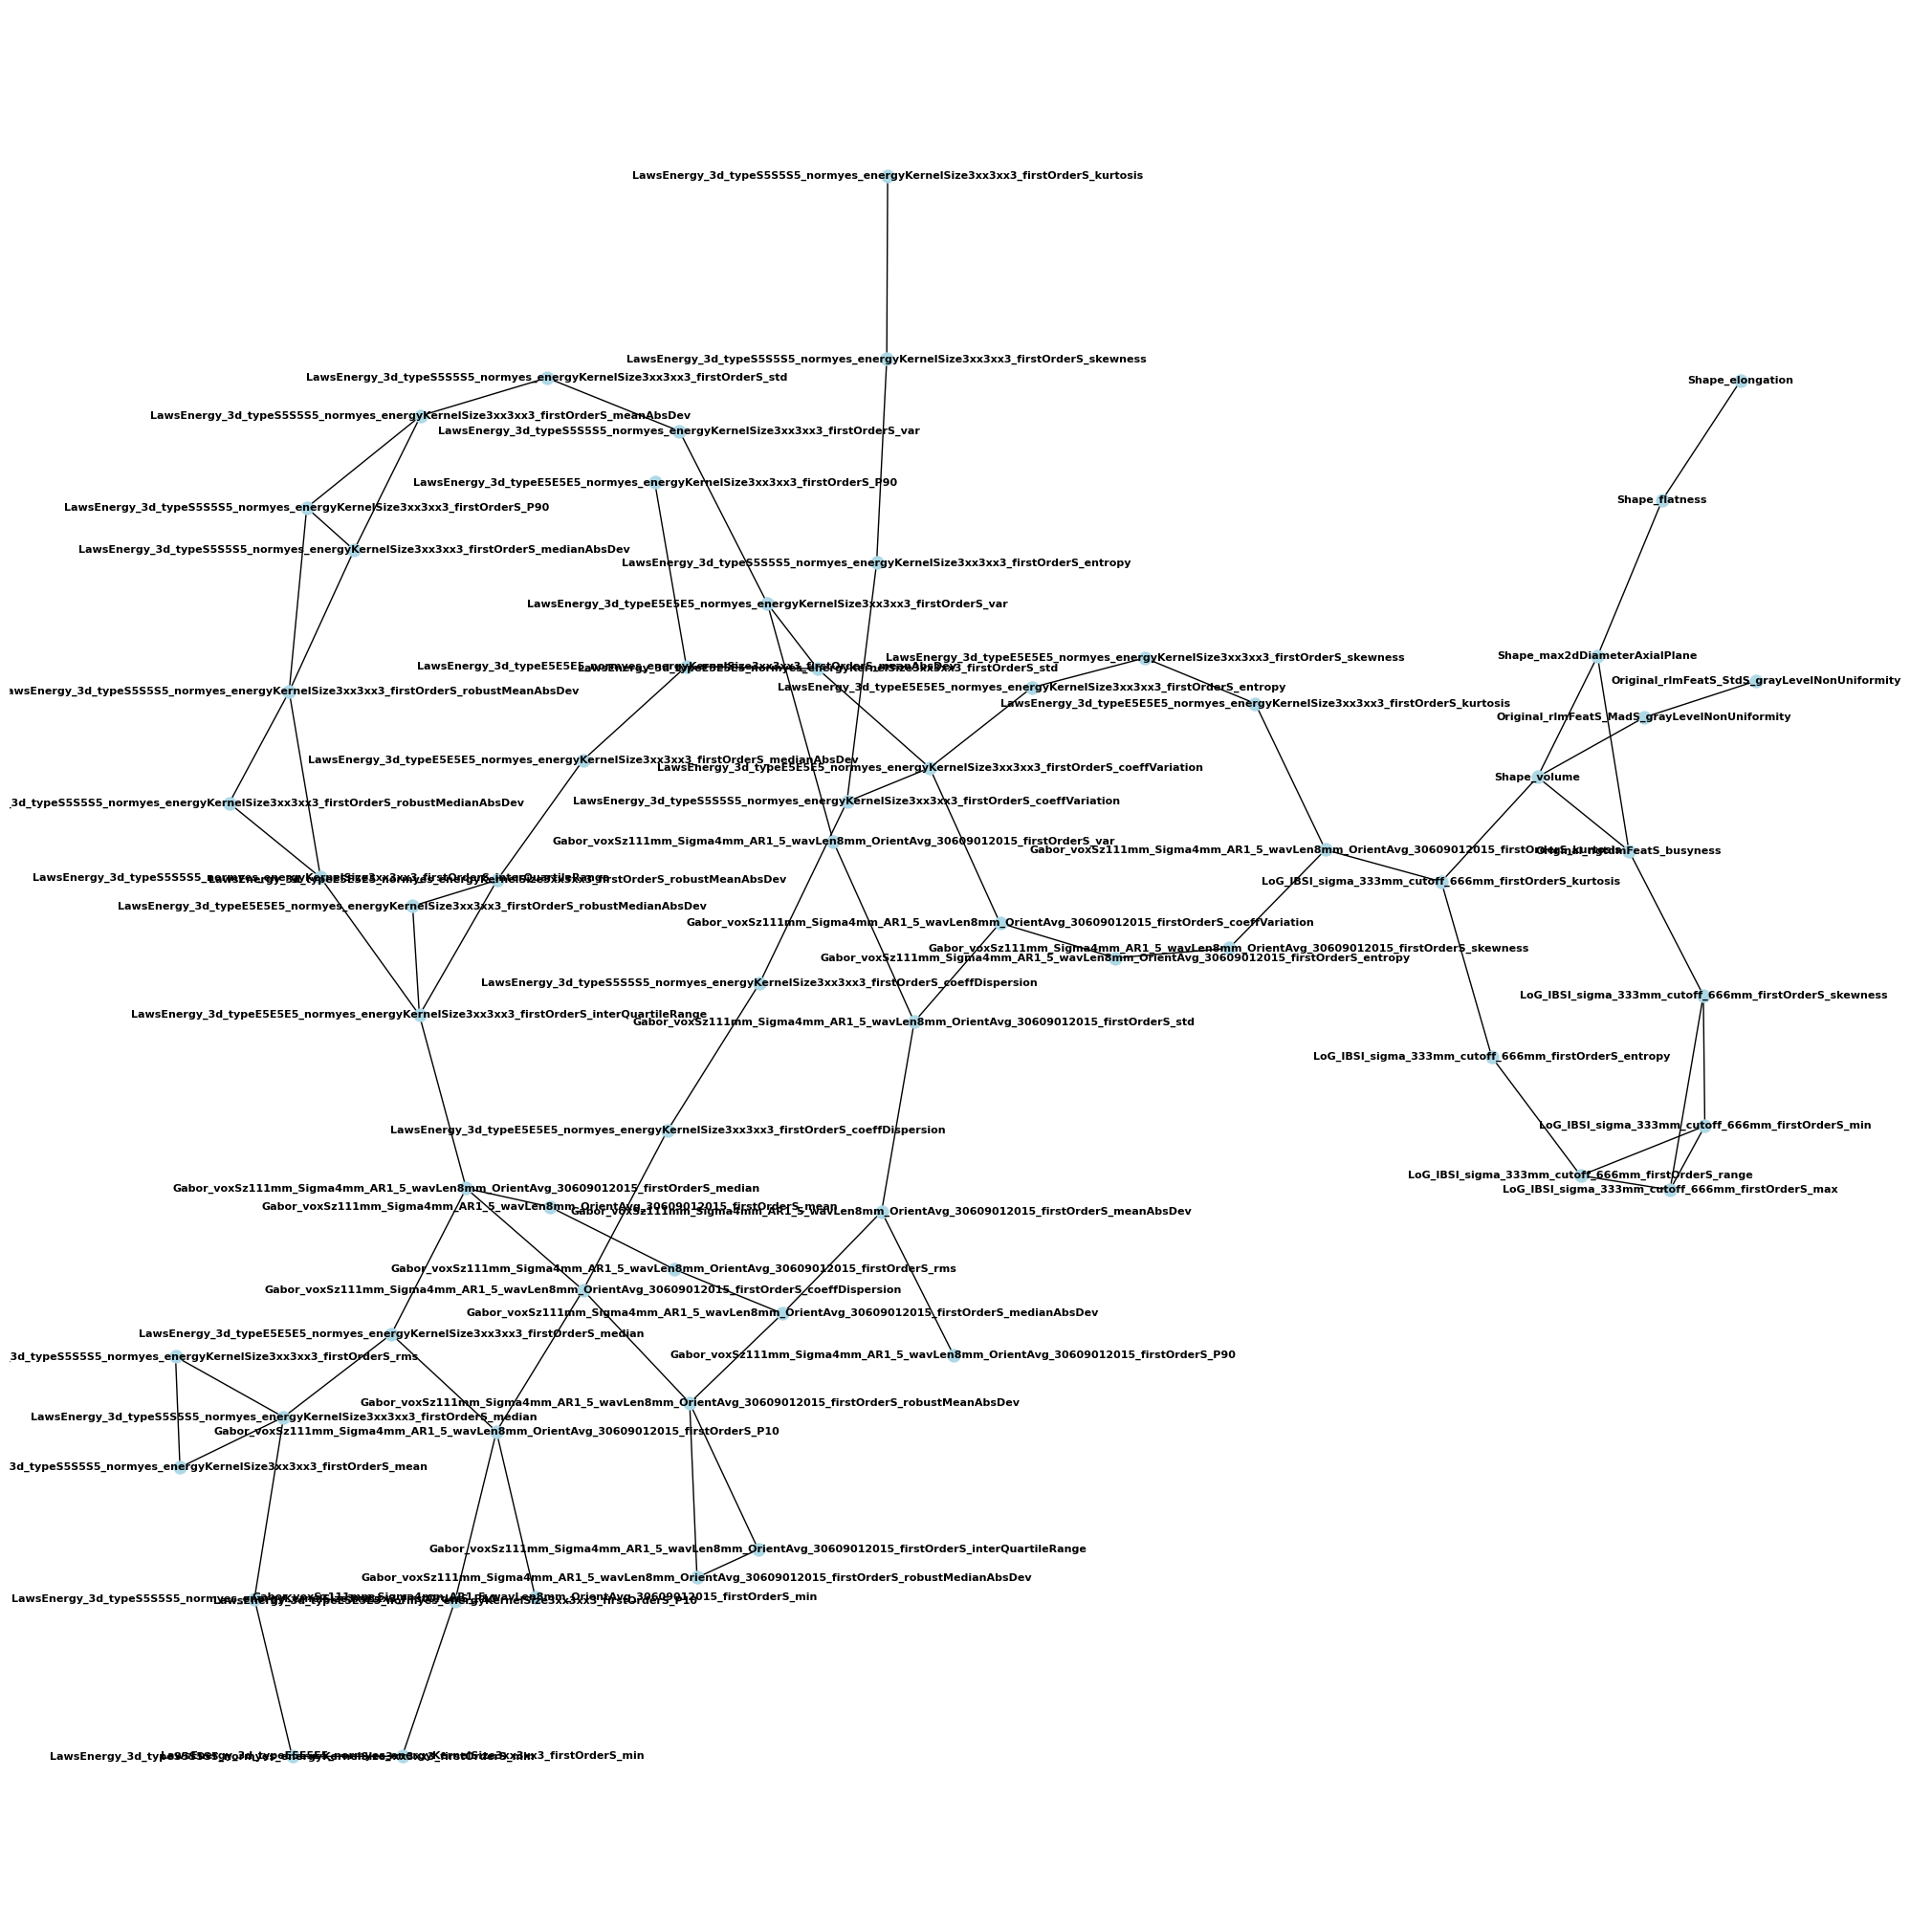

In [ ]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0]) # 0: the largest connected network
plt.figure(2,figsize=(20,20))
nx.draw(G0, pos = nx.nx_pydot.graphviz_layout(G0), node_size=100, \
    node_color='lightblue', linewidths=0.25, font_size=8, \
    font_weight='bold', with_labels=True )
adj_G0 = nx.adjacency_matrix(G0)

nodes0=G0.nodes
df_G0=df_red[list(nodes0)]
print(adj_G0)

## Unbalanced OMT with CVX

In [ ]:
def unbalanced_CVX(rho0, rho1, G, gamma):
  n=len(rho1)

  List1=list(range(0,(n+1)*(n+1)-1,n+1))
  List2=list(range(n+1))
  AA=None
  for k in range(n):
      row_temp=np.zeros((n+1)*(n+1))
      row_temp[np.add(List1,k)]=1
      if AA is None:
          AA=row_temp
      else:
          AA=np.vstack((AA,row_temp))

  for k in range(n):
      row_temp=np.zeros((n+1)*(n+1))
      row_temp[np.add(List2,k*(n+1))]=1
      AA=np.vstack((AA,row_temp))

  A=nx.shortest_path_length(G)
  A=dict(A)
  D=[A[i][j] for i in range(n) for j in range(n)]
  D=np.reshape(D,[n,n])
  DD=gamma*np.ones([n+1,n+1])
  DD[0:n,0:n]=D
  DD[n,n]=0
  DD=DD.flatten()

  b=np.concatenate((rho1,rho0))

  # Create two scalar optimization variables.
  x = cp.Variable((n+1)*(n+1))

  # Create two constraints.
  constraints = [AA @ x - b == 0, x>=0]

  prob = cp.Problem(cp.Minimize(DD.T@x), constraints)
  prob.solve()
  d=prob.value

  return d

# Kmeans process

In [ ]:
def initiate_centroids(k, dset):
    centroids = dset.sample(k)
    return centroids

def rsserr(a,b):
    return np.square(np.sum((a-b)**2))

def centroid_assignation(G0, gamma, dset, centroids, no_feature):
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):

            rho0=centroids.iloc[centroid, 0:no_feature].to_numpy()
            rho1=dset.iloc[obs,0:no_feature].to_numpy()

            err = unbalanced_CVX(rho0, rho1, G0, gamma)
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

## Wasserstein distance-based Kmeans

In [ ]:
def kmeans(G0, gamma, dset, k, no_feature, dis, tol=1e-5):
    working_dset = dset.copy()
    err = []
    goahead = True
    j = 0

    # Initiate clusters by defining centroids
    centroids = initiate_centroids(k, dset)
    ITER=5
    while(goahead):
        print(j)
        # Assign centroids and calculate error
        working_dset['centroid'], j_err = centroid_assignation(G0, gamma, working_dset, centroids, no_feature)
        err.append(sum(j_err))

        #  Update centroid position
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        # Restart the iteration
        if j>0:
            if np.abs(err[j-1]-err[j])<=tol:
                goahead = False
        j+=1

    working_dset['centroid'], j_err = centroid_assignation(G0, gamma, working_dset, centroids, no_feature)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

    return working_dset['centroid'], j_err, centroids

## Run UOTK

In [ ]:
T = df_G0.to_numpy()
T = np.transpose(T)
no_sample = T.shape[1]
no_feature = T.shape[0]

NO_CLUSTER = 2 # number of clusters
gamma = 1 # parameter for unblanced OMT
G_0_dis=nx.floyd_warshall_numpy(G0)
df_G0_copy=df_G0.copy()

mapping = dict(zip(G0, range(0, df_G0_copy.shape[1])))
G0 = nx.relabel_nodes(G0, mapping)

df_G0['centroid'], df_G0['error'], centroids =  kmeans(G0, gamma, df_G0, NO_CLUSTER, no_feature, G_0_dis)

0
1
2
3
4
5
6


/tmp/ipython-input-1103993484.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_G0['centroid'], df_G0['error'], centroids =  kmeans(G0,gamma,df_G0, NO_CLUSTER, no_feature, G_0_dis)
/tmp/ipython-input-1103993484.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_G0['centroid'], df_G0['error'], centroids =  kmeans(G0,gamma,df_G0, NO_CLUSTER, no_feature, G_0_dis)
